## Tutorial Opencv

> Este tutorial apresenta conceitos introdutórios de processamento de imagens (filtros) e de visão computacional (segmentação, classificação, reconhecimento de padrão e rastreamento). Estes conceitos serão introduzidos utilizando a biblioteca **OpenCV**, que é distribuída gratuitamente e possui documentação farta na internet, com exemplos e aplicações práticas. Para utilizar essa biblioteca em python acesse o terminal com ambiente de python ativado e digite ```pip install opencv-python```.

In [2]:
# Importação das bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Leitura da imagem com a função imread()
imagem = cv2.imread('entrada.jpg')

#Propriedades da imagem
print('Propriedades da imagem: ', end='')
print(imagem.shape)

#Altura da imagem 
print('Altura em pixels: ', end='')
print(imagem.shape[0])

#Largura da imagem
print('Largura em pixels: ', end='')
print(imagem.shape[1])

#Qtde de canais
print('Qtde de canais: ', end='')
print(imagem.shape[2])

# Mostra a imagem com a função imshow
cv2.imshow("Nome da janela", imagem)
cv2.waitKey(0) #espera pressionar qualquer tecla

# Salvar a imagem no disco com função imwrite()
cv2.imwrite("saida.jpg", imagem)

Propriedades da imagem: (254, 248, 3)
Altura em pixels: 254
Largura em pixels: 248
Qtde de canais: 3


True

> A importação da biblioteca padrão da OpenCV é obrigatória para utilizar suas funções. A primeira função usada é para abrir a imagem através de ```cv2.imread()``` que leva como argumento o nome do arquivo em disco. 

> A imagem é lida e armazenada em ‘imagem’ que é uma variavel que dará acesso ao objeto da imagem que nada mais é que uma matriz de 3 dimensões (3 canais) contendo em cada dimensão uma das 3 cores do padrão RGB (red=vermelho, green-verde, blue=azul). 

> No caso de uma imagem preto e branca temos apenas um canal, ou seja, apenas uma matriz de 2 dimensões. Para facilitar o entendimento podemos pensar em uma planilha eletrônica, com linhas e colunas, portanto, uma matriz de 2 dimensões. Cada célula dessa matriz é um pixel, que no caso de imagens preto e brancas possuem um valor de 0 a 255, sendo 0 para preto e 255 para branco. Portanto, cada célula contém um inteiro de 8 bits (sem sinal) que em Python é definido por “uint8” que é um unsigned integer de 8 bits. 

> No  caso  de  imagens  preto  e  branca  é  composta  de  apenas  uma  matriz  de  duas  dimensões  como  na  imagem  acima.  
> Já  para  imagens  coloridas  temos  três  dessas  matrizes  de duas dimensões cada uma representando uma das cores do sistema RGB. Portanto, cada pixel é formado de uma tupla de 3 inteiros de 8 bits sem sinal no sistema (R,G,B) sendo que (0,0,0) representa o preto, (255,255,255) o branco. Nesse sentido, as cores mais comuns são:  

> Branco - RGB (255,255,255); 
Azul - RGB (0,0,255); 
Vermelho - RGB (255,0,0); 
Verde - RGB (0,255,0); 
Amarelo - RGB (255,255,0); 
Magenta - RGB (255,0,255); 
Ciano - RGB (0,255,255); 
Preto - RGB (0,0,0). 

> As imagens coloridas, portanto, são compostas normalmente de 3 matrizes de inteiros  sem  sinal  de  8  bits,  a  junção  das  3  matrizes  produz  a  imagem  colorida  com  capacidade  de reprodução de 16,7 milhões de cores, sendo que os 8 bits tem capacidade para 256 valores e  elevando a 3 temos 256³ = 16,7 milhões. 

> Podemos  alterar  a  cor  individualmente  para  cada  pixel, ou seja, podemos manipular individualmente cada pixel da imagem.  Para isso é importante entender o sistema de coordenadas (linha, coluna) onde o pixel mais a esquerda e acima da imagem esta na posição (0,0) esta na linha zero e coluna zero. Já em uma imagem com 300 pixels de largura, ou seja, 300 colunas e tendo 200 pixels de altura,  ou  seja,  200  linhas,  terá  o  pixel  (199,299)  como  sendo  o  pixel  mais  a  direita  e  abaixo  da imagem.  

> A partir do entendimento do sistema de coordenadas é possível alterar individualmente cada pixel ou ler a informação individual do pixel conforme abaixo: 

> Imagens são matrizes Numpy neste caso retornadas pelo método ```“imread”``` e armazenada em memória através da variável “imagem” conforme acima. Lembre-se que o pixel superior mais a esquerda é o (0,0). 

> No código é retornado na tupla (b, g, r) os respectivos valores das cores do pixel superior mais a esquerda. Veja que o método retorna a sequência BGR e não RGB como poderiamos esperar. Tendo os valores inteiros de cada cor é possível exibi-los na tela com o código abaixo:

In [3]:
imagem = cv2.imread('ponte.png') 
(b, g, r) = imagem[0, 0] # Veja que a ordem BGR e não RGB  = tupla

print('O pixel (0, 0) tem as seguintes cores:') 
print('Vermelho:', r, 'Verde:', g, 'Azul:', b)  

O pixel (0, 0) tem as seguintes cores:
Vermelho: 255 Verde: 255 Azul: 255


> Outra possibilidade é utilizar dois laços de repetição para “varrer” todos os pixels da  imagem, linha por linha como é o caso do código abaixo. Importante notar que esta estratégia pode  não  ser  muito  performática  já  que  é  um  processo  lento  varrer  toda  a  imagem  pixel  a pixel. 

In [4]:
imagem = cv2.imread('ponte.png') 
for y in range(0, imagem.shape[0]):
    for x in range(0, imagem.shape[1]):
        imagem[y, x] = (255,0,0)
        
cv2.imshow("Imagem modificada", imagem) 
cv2.waitKey(0) #espera pressionar qualquer tecla

-1

> O objetivo agora é saltar a cada 10 pixels ao percorrer as linhas e mais 10 pixels ao percorrer as colunas. A cada salto é criado um quadrado amarelo de 5x5 pixels. Desta vez parte da imagem original é preservada e  podemos ainda observar a ponte por baixo da grade de quadrados amarelos. 

In [10]:
imagem = cv2.imread('ponte.png')
for y in range(0, imagem.shape[0], 10): #percorre linhas saltando 10 linhas
    for x in range(0, imagem.shape[1], 10): #percorre colunas saltando 10 colunas
        imagem[y: y+5, x: x+5] = (0,255,255)
cv2.imshow("Imagem modificada", imagem) 
cv2.waitKey(0)

-1

### Cortando uma imagem / Crop

> Veja  o  código  abaixo onde criamos uma nova imagem a partir de um pedaço da imagem original (ROI) e a salvamos no
disco.

In [7]:
imagem = cv2.imread('ponte.png')
recorte = imagem[100:200, 100:200]  #imagem[linhas, colunas] ou imagem[altura, largura] ou imagem[y, x]

cv2.imshow("Recorte da imagem", recorte)
cv2.waitKey(0)

cv2.imwrite("recorte.png", recorte) #salva no disco 

True

### Redimensionamento / Resize

> Para  reduzir  ou  aumentar  o  tamanho  da  imagem,  existe  uma  função  já  pronta  da OpenCV, trata-se da função ```resize``` mostrada abaixo. 

> Importante notar que é preciso calcular a proporção da altura em relação a largura da nova imagem, caso contrário ela poderá ficar distorcida.

In [4]:
img = cv2.imread('ponte.png')
#cv2.imshow("Original", img)

largura = img.shape[1]
altura = img.shape[0]
proporcao = float(altura/largura)

largura_nova = 320 #em pixels
altura_nova = int(largura_nova*proporcao)
tamanho_novo = (largura_nova, altura_nova)

img_redimensionada = cv2.resize(img, tamanho_novo, interpolation = cv2.INTER_AREA)
cv2.imshow('Resultado', img_redimensionada)
cv2.waitKey(0) 

-1

> Veja  que  a  função  ```resize```  utiliza  uma  propriedade  aqui  definida  com ```cv2.INTER_AREA``` que  é  uma  especificação  do  cálculo  matemático  para  redimensionar  a imagem. Apesar disso, caso a imagem seja redimensionada para um tamanho maior é preciso ponderar que ocorrerá perda de qualidade.  

### Espelhando uma imagem / Flip  

> Para espelhar uma imagem, basta inverter suas linhas, suas colunas ou ambas.  
* Invertendo as linhas: flip horizontal 
* Invertendo as colunas: flip vertical.
    
> Podemos fazer o espelhamento/flip tanto com uma função oferecida pela OpenCV (função flip) como através da manipulação direta das matrizes que compõe a imagem. 

In [13]:
img = cv2.imread('ponte.png')
cv2.imshow("Original", img) 

#flip_horizontal = img[::-1,:] #comando equivalente abaixo 
flip_horizontal = cv2.flip(img, 0)  
cv2.imshow("Flip Horizontal", flip_horizontal) 

#flip_vertical = img[:,::-1] #comando equivalente abaixo 
flip_vertical = cv2.flip(img, 1)  
cv2.imshow("Flip Vertical", flip_vertical) 

#flip_hv = img[::-1,::-1] #comando equivalente abaixo  
flip_hv = cv2.flip(img, -1)
cv2.imshow("Flip Horizontal e Vertical", flip_hv)

cv2.waitKey(0) 

-1

### Rotacionando uma imagem / Rotate

> A  transformação  ```affine```  ou  ```mapa  affine```,  é  uma  função  entre  espaços  affine  que preservam  os  pontos,  grossura  de linhas  e  planos.  Além  disso,  linhas  paralelas  permanecem paralelas após uma transformação affine. Essa transformação não necessariamente preserva a distância entre pontos mas ela preserva a proporção das distâncias entre os pontos de uma linha reta. Uma rotação é um tipo de transformação affine. 

In [20]:
img = cv2.imread('ponte.png')

(alt, lar) = img.shape[:2] #captura altura e largura 
centro = (lar // 2, alt // 2) #acha o centro  

M = cv2.getRotationMatrix2D(centro, 30, 1.0)#30 graus 
img_rotacionada = cv2.warpAffine(img, M, (lar, alt))  

cv2.imshow("Imagem rotacionada em 30 graus", img_rotacionada) 
cv2.waitKey(0)
  

-1

### Sistemas de cores 

> Já  conhecemos  o  tradicional  espaço  de  cores  **RGB  (Red,  Green,  Blue)**  que  sabemos que  em  OpenCV  é  na  verdade  BGR  dada  a  necessidade  de  colocar  o  azul  como  primeiro elemento e o vermelho como terceiro elemento de uma tupla que compõe as cores de pixel.  

> Contudo, existem outros espaços de cores como o próprio “Preto e Branco” ou “tons de cinza”, além de outros coloridos como o **L*a*b*** e o **HSV**. Abaixo temos um exemplo de como ficaria nossa imagem da ponte nos outros espaços de cores :

In [21]:
img = cv2.imread('ponte.png')

cv2.imshow("Original", img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV", hsv)

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2.imshow("L*a*b*", lab)

cv2.waitKey(0) 

113

> Como  já  sabemos  uma  imagem  colorida  no  formato  RGB  possui  3  canais,  um  para cada  cor.  

>Existem  funções  do  OpenCV  que  permitem  separar  e  visualizar  esses  canais individualmente. Veja: 

> A função ```split``` faz o trabalho duro separando os canais. Assim podemos exibi-los em tons de cinza conforme mostra a imagem abaixo:

In [2]:
img = cv2.imread('ponte.png')

(canalAzul, canalVerde, canalVermelho) = cv2.split(img)

cv2.imshow("Vermelho", canalVermelho) 
cv2.imshow("Verde", canalVerde) 
cv2.imshow("Azul", canalAzul) 

cv2.waitKey(0) 

-1

> Também é possível alterar individualmente as Numpy Arrays que formam cada canal e depois juntá-las para criar novamente a imagem. Para isso use o comando: 

In [5]:
resultado = cv2.merge([canalAzul, canalVerde, canalVermelho]) 
cv2.imshow("resultado", resultado)
cv2.waitKey(0) 

-1

>Também é possível exibir os canais nas cores originais conforme abaixo:  

In [12]:
img = cv2.imread('ponte.png')  

(canalAzul, canalVerde, canalVermelho) = cv2.split(img)  
zeros = np.zeros(img.shape[:2], dtype = "uint8")  

cv2.imshow("Vermelho", cv2.merge([zeros, zeros, canalVermelho]))  
cv2.imshow("Verde", cv2.merge([zeros, canalVerde, zeros])) 
cv2.imshow("Azul", cv2.merge([canalAzul, zeros, zeros])) 

cv2.imshow("Original", img) 
cv2.waitKey(0) 

-1

### Histogramas e equalização de imagem

> Um histograma é um gráfico de colunas ou de linhas que representa a distribuição dos valores dos pixels de uma imagem, ou seja, a quantidade de pixeis mais claros (próximos de 255) e a quantidade de pixels mais escuros (próximos de 0). O eixo X do gráfico normalmente possui uma distribuição de 0 a 255 que demonstra o valor (intensidade) do pixel e no eixo Y é plotada a quantidade de pixels daquela intensidade.

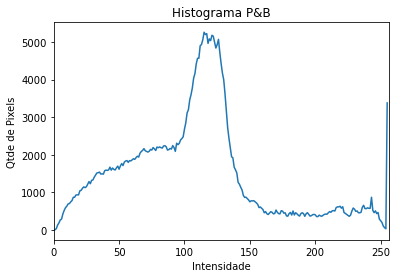

-1

In [3]:
img = cv2.imread('ponte.png')  

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B 
cv2.imshow("Imagem P&B", img) 

#Função calcHist para calcular o histograma da imagem 
h = cv2.calcHist([img], [0], None, [256], [0, 256]) 

plt.figure() 
plt.title("Histograma P&B") 
plt.xlabel("Intensidade") 
plt.ylabel("Qtde de Pixels") 
plt.plot(h) 
plt.xlim([0, 256]) 
plt.show() 
cv2.waitKey(0)  

> Perceba  que  no  histograma  existe  um  pico  ao  centro  do  gráfico,  entre  100  e  150,  demonstrando  a  grande  quantidade  de  pixels  nessa  faixa  devido  a  estrada  que  ocupa  grande parte da imagem possui pixels nessa faixa.

> Também  é  possível  plotar  o  histograma  de  outra  forma,  com  a  ajuda  da  função ‘ravel()’. Neste caso o eixo X avança o valor 255 indo até 300, espaço que não existem pixels.  

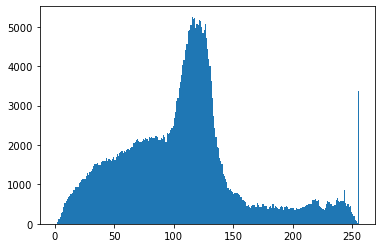

In [5]:
plt.hist(img.ravel(),256,[0,256]) 
plt.show() 

> Além do histograma da imagem em tons de cinza é possível plotar um histograma da imagem colorida. Neste caso teremos três linhas, uma para cada canal. 

> Importante notar que a função ```zip``` cria uma lista de tuplas formada  pelas  união das  listas  passadas  e  não  tem  nada  a  ver  com  um  processo  de  compactação  como  poderia  se esperar

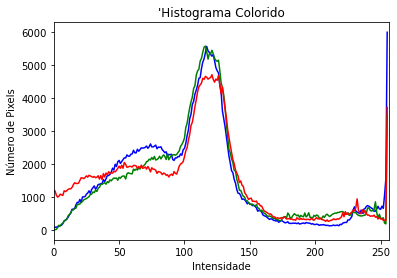

In [15]:
img = cv2.imread('ponte.png')  

#cv2.imshow("Imagem Colorida", img)
#cv2.waitKey(0)  

#Separa os canais
canais = cv2.split(img)
cores = ("b", "g", "r")

plt.figure()
plt.title("'Histograma Colorido")
plt.xlabel("Intensidade")
plt.ylabel("Número de Pixels")


for (canal, cor) in zip(canais, cores):
    #Este loop executa 3 vezes, uma para cada canal
    hist = cv2.calcHist([canal], [0], None, [256], [0, 256])
   
    plt.plot(hist, cor)
    
plt.xlim([0, 256])
plt.show() 

### Equalização de Histograma 

> É possível realizar um cálculo matemático sobre a distribuição de pixels para aumentar o contraste da imagem. A intenção neste caso é distribuir de forma mais uniforme as intensidades dos pixels sobre a imagem. No histograma é possível identificar a diferença pois o acumulo de pixels próximo a alguns valores é suavizado. Veja a diferença entre o histograma original e o equalizado abaixo:


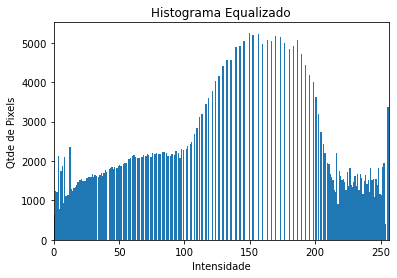

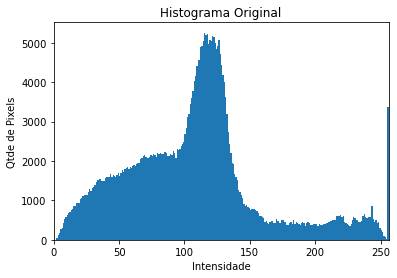

-1

In [16]:
img = cv2.imread('ponte.png')  

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h_eq = cv2.equalizeHist(img)

plt.figure()
plt.title("Histograma Equalizado")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(h_eq.ravel(), 256, [0,256])

plt.xlim([0, 256])
plt.show()
plt.figure()

plt.title("Histograma Original")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(img.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()

cv2.waitKey(0) 

### Suavização de imagens

> A  suavização  da  imagem  (do  inglês  Smoothing),  também  chamada  de  ‘blur’  ou ‘blurring’ que podemos traduzir para “borrão”, é um efeito que podemos notar nas fotografias fora de foco ou desfocadas onde tudo fica embasado. 

> Na  verdade  esse  efeito  pode  ser  criado  digitalmente,  basta  alterar  a  cor  de  cada  pixel misturando  a  cor  com  os  pixels  ao  seu  redor.  Esse  efeito  é  muito  útil  quando  utilizamos algoritmos  de  identificação  de  objetos  em  imagens  pois  os  processos  de  detecção  de  bordas por exemplo, funcionam melhor depois de aplicar uma suavização na imagem.

### Suavização por cálculo da média

> Neste caso é criada uma “máscara para envolver o pixel em questão e calcular seu novo valor. O novo valor do pixel será a média simples dos valores dos pixels dentro da máscara,  ou  seja,  dos  pixels  da  vizinhança.  Alguns  autores  chamam  esta  máscara  de  janela  de cálculo ou kernel (do inglês núcleo).

> Portanto o novo valor do pixel será a média da sua vizinhança o que gera a suavização na imagem como um todo.  No código abaixo percebemos que o método utilizado para a suavização pela média é o  método  ```blur```  da  OpenCV.  Os  parâmetros  são  a  imagem  a  ser  suavizada  e  a  janela  de suavização. Colocarmos números impars para gerar as caixas de cálculo pois dessa forma não existe dúvida sobre onde estará o pixel central que terá seu valor atualizado.  Perceba que usamos as funções ```vstack``` (pilha vertical) e ```hstack``` (pilha horizontal) para juntar as imagens em uma única imagem final mostrando desde a imagem original e seguinte com caixas de calculo de 3x3, 5x5, 7x7, 9x9 e 11x11. Perceba que conforme aumenta a caixa maior é o efeito de borrão (blur) na imagem.  

In [18]:
img = cv2.imread('ponte.png') 

img = img[::2,::2] # Diminui a imagem  
suave = np.vstack([
    np.hstack([img,cv2.blur(img, ( 3,  3))]),
    np.hstack([cv2.blur(img, (5,5)), cv2.blur(img, ( 7,  7))]),
    np.hstack([cv2.blur(img, (9,9)), cv2.blur(img, (11, 11))]),])  

cv2.imshow("Imagens suavisadas (Blur)", suave) 
cv2.waitKey(0)  

-1

### Suavização pela mediana

> Da  mesma  forma  que  os  cálculos  anteriores,  aqui  temos  o  cálculo  de  uma  caixa  ou  janela  quadrada  sobre  um  pixel  central  onde  matematicamente  se  utiliza  a  mediana  para calcular o valor final do pixel. A mediana é semelhante à média, mas ela despreza os valores muito altos ou muito baixos que podem distorcer o resultado. 

> A mediana é o número que fica exatamente no meio do intervalo. A  função  utilizada  é  a  cv2.medianBlur(img,  3)  e  o  único  argumento  é  o  tamanho  da caixa ou janela usada. 

> É importante notar que este método não cria novas cores, como pode acontecer com os anteriores, pois ele sempre altera a cor do pixel atual com um dos valores da vizinhança. 

In [19]:
img = cv2.imread('ponte.png')

img = img[::2,::2] # Diminui a imagem
suave = np.vstack([
    np.hstack([img,cv2.medianBlur(img,  3)]),
    np.hstack([cv2.medianBlur(img,  5), cv2.medianBlur(img,  7)]),
    np.hstack([cv2.medianBlur(img,  9), cv2.medianBlur(img, 11)]),
])

cv2.imshow("Imagem original e suavizadas pela mediana", suave)
cv2.waitKey(0) 

-1

### Suavização com filtro bilateral  

> Este  método  é  mais  lento  para calcular  que os  anteriores  mas  como  vantagem apresenta a preservação de bordas e garante que o ruído seja removido.  

> Para  realizar  essa  tarefa,  além  de  um  filtro  gaussiano  do  espaço  ao  redor  do  pixel também é utilizado outro cálculo com outro filtro gaussiano que leva em conta a diferença de intensidade  entre  os  pixels,  dessa  forma,  como  resultado  temos  uma  maior  manutenção  das bordas das imagem. A função usada é cv2.bilateralFilter() e o código usado segue abaixo: 

In [20]:
img = cv2.imread('ponte.png')

img = img[::2,::2] # Diminui a imagem
suave = np.vstack([
    np.hstack([img, cv2.bilateralFilter(img,  3, 21, 21)]),
    np.hstack([cv2.bilateralFilter(img,  5, 35, 35), cv2.bilateralFilter(img,  7, 49, 49)]),
    np.hstack([cv2.bilateralFilter(img,  9, 63, 63),cv2.bilateralFilter(img, 11, 77, 77)])
]) 

cv2.imshow("Imagem original e suavizadas com filtro bilateral", suave)
cv2.waitKey(0) 

-1

### Binarização com limiar

> Thresholding  pode  ser  traduzido  por  limiarização  e  no  caso  de  processamento  de imagens  na  maior  parte  das  vezes  utilizamos  para  binarização  da  imagem.  

> Normalmente convertemos  imagens  em  tons  de  cinza  para  imagens  preto  e  branco  onde  todos  os  pixels possuem 0 ou 255 como valores de intensidade.  

In [25]:
img = cv2.imread('ponte.png') 

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
suave = cv2.GaussianBlur(img, (7, 7), 0) # aplica blur  

(T, bin) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY) 
(T, binI) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY_INV) 

resultado = np.vstack([
    np.hstack([suave, bin]),  
    np.hstack([binI, cv2.bitwise_and(img, img, mask = binI)])  
])   

cv2.imshow("Binarizacao da imagem", resultado) 
cv2.waitKey(0) 

-1

### Threshold adaptativo  

> O valor de intensidade 160 utilizada para a binarização acima foi arbitrado, contudo, é possível otimizar esse valor matematicamente. Esta é a proposta do threshold adaptativo.  

> Para isso precisamos dar um valor da janela ou caixa de cálculo para que o limiar seja calculado nos pixels próximos das imagem. Outro parâmetro é um inteiro que é subtraído da média calculada dentro da caixa para gerar o threshold final.